In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set_style
sns.set_theme(palette='Paired',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.preprocessing import StandardScaler,Normalizer,LabelEncoder,PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
main = pd.read_csv('predictive_maintenance[1].csv')

In [4]:
main.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
main.shape

(10000, 10)

In [6]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
main.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [8]:
main.duplicated().sum()

0

In [9]:
main.describe(include= 'all').style.background_gradient(cmap="summer")

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,nan,10000,3,nan,nan,nan,nan,nan,nan,6
top,nan,M14860,L,nan,nan,nan,nan,nan,nan,No Failure
freq,nan,1,6000,nan,nan,nan,nan,nan,nan,9652
mean,5000.500000,nan,nan,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,nan
std,2886.895680,nan,nan,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,nan
min,1.000000,nan,nan,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,nan
25%,2500.750000,nan,nan,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,nan
50%,5000.500000,nan,nan,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,nan
75%,7500.250000,nan,nan,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,nan


In [10]:
main.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [11]:
main.drop(['UDI','Product ID'], axis=1,inplace=True)

In [12]:
for col in main[['Type','Target','Failure Type']]:
    print(main[col].value_counts())

L    6000
M    2997
H    1003
Name: Type, dtype: int64
0    9661
1     339
Name: Target, dtype: int64
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64


In [13]:
target = main[main['Target']==1]
target

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure
...,...,...,...,...,...,...,...,...
9758,L,298.6,309.8,2271,16.2,218,1,Tool Wear Failure
9764,L,298.5,309.5,1294,66.7,12,1,Power Failure
9822,L,298.5,309.4,1360,60.9,187,1,Overstrain Failure
9830,L,298.3,309.3,1337,56.1,206,1,Overstrain Failure


In [14]:
target1 = main[main['Target']==0]
target1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


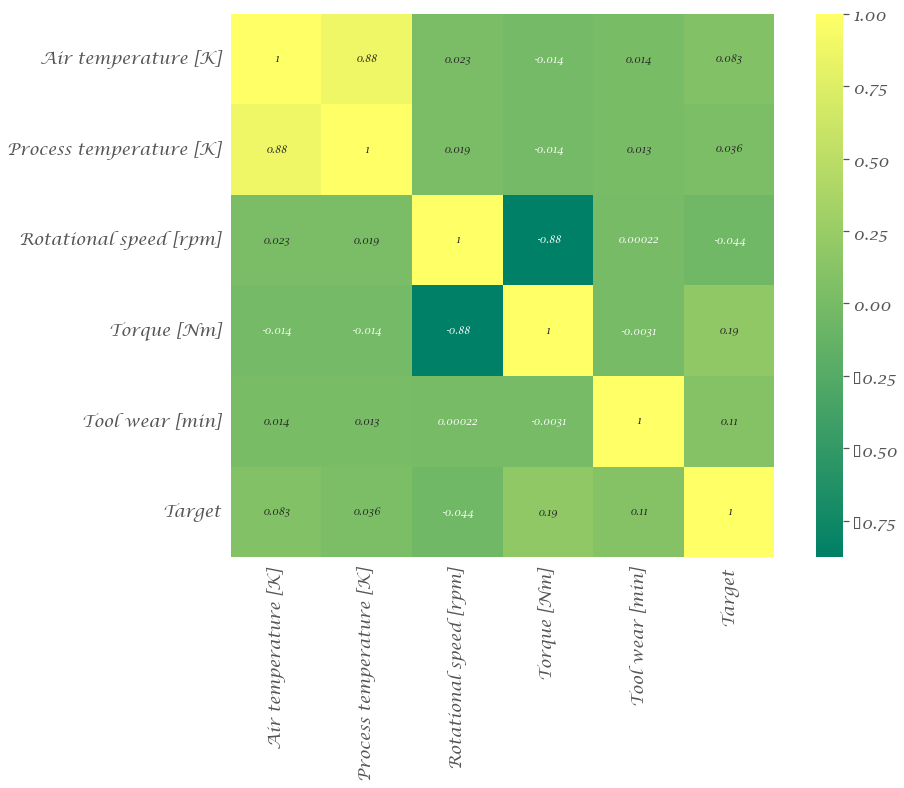

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(main.corr(),cmap='summer', annot=True, square=True )
plt.show()

In [16]:
for i in main[['Type','Target', 'Failure Type']]:
    print(main.groupby(i)['Air temperature [K]'].mean())


Type
H    299.866999
L    300.015833
M    300.029263
Name: Air temperature [K], dtype: float64
Target
0    299.973999
1    300.886431
Name: Air temperature [K], dtype: float64
Failure Type
Heat Dissipation Failure    302.567857
No Failure                  299.972855
Overstrain Failure          299.867949
Power Failure               300.075789
Random Failures             300.766667
Tool Wear Failure           300.288889
Name: Air temperature [K], dtype: float64


In [17]:
for i in main[['Type','Target', 'Failure Type','Rotational speed [rpm]']]:
    print(main.groupby(i)['Process temperature [K]'].max())


Type
H    313.5
L    313.8
M    313.8
Name: Process temperature [K], dtype: float64
Target
0    313.8
1    313.7
Name: Process temperature [K], dtype: float64
Failure Type
Heat Dissipation Failure    312.2
No Failure                  313.8
Overstrain Failure          313.1
Power Failure               313.2
Random Failures             312.5
Tool Wear Failure           313.7
Name: Process temperature [K], dtype: float64
Rotational speed [rpm]
1168    307.2
1181    309.8
1183    309.7
1192    310.6
1200    311.6
        ...  
2825    310.2
2833    307.4
2861    309.1
2874    308.7
2886    308.0
Name: Process temperature [K], Length: 941, dtype: float64


<Figure size 1440x720 with 0 Axes>

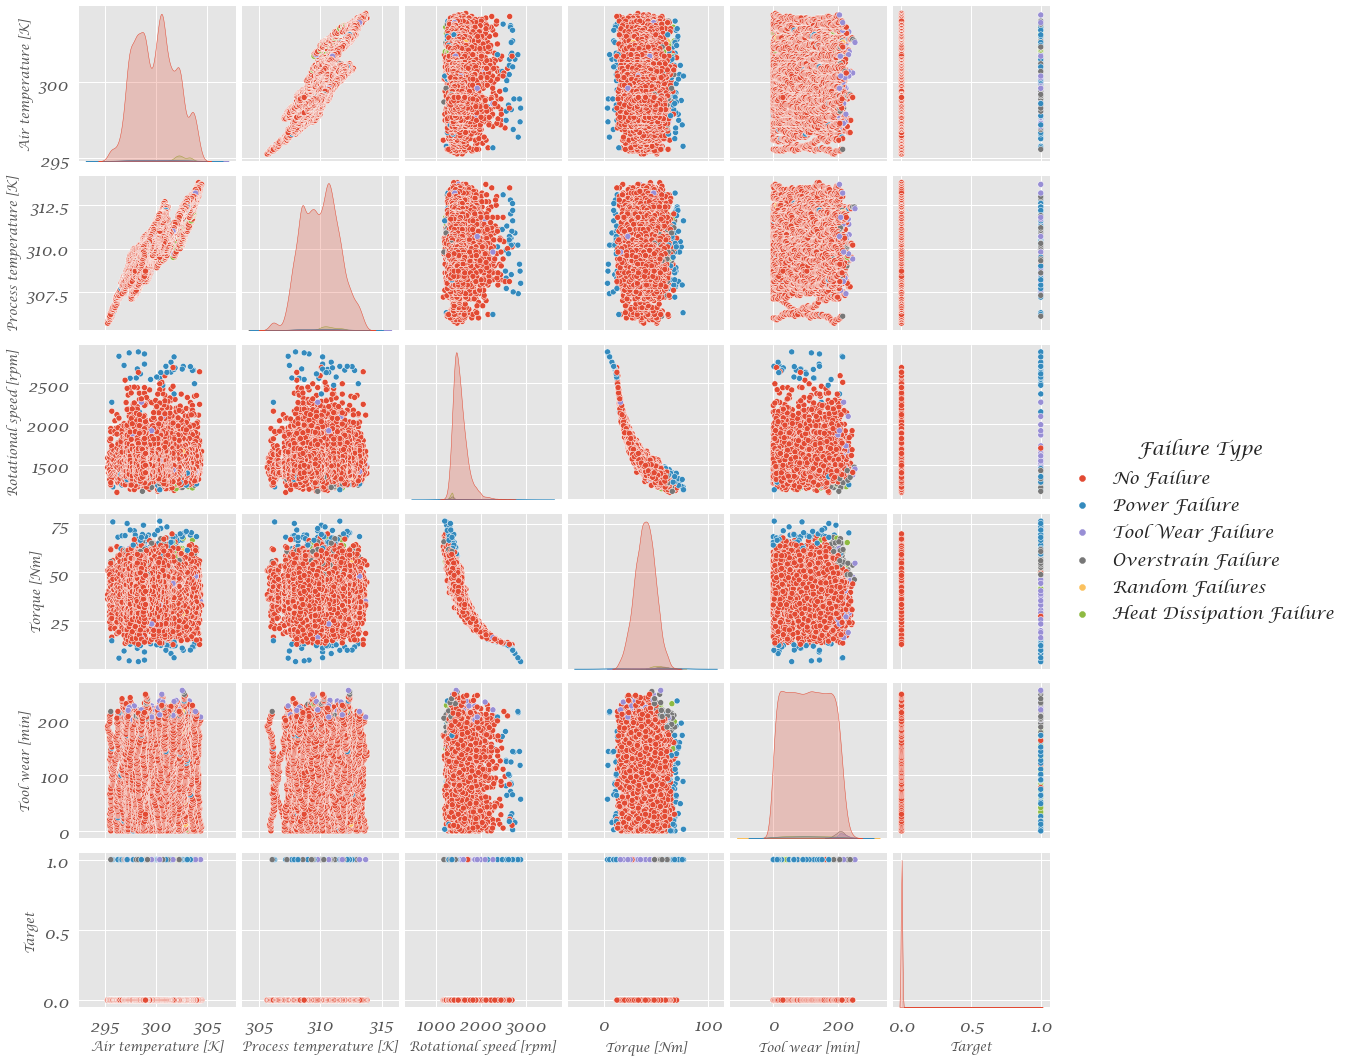

In [18]:
plt.figure(figsize=(20,10))
sns.pairplot(data=main, hue='Failure Type')
plt.show()

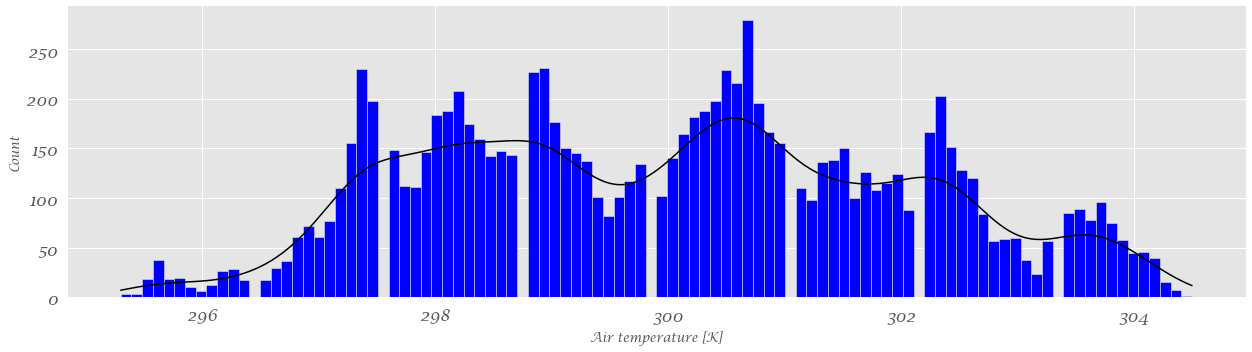

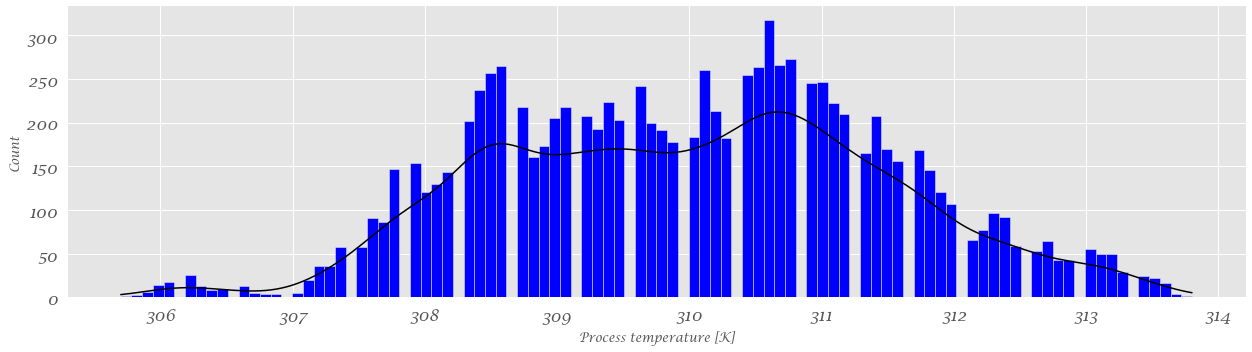

In [19]:
sns.displot(data=main, x="Air temperature [K]", kde=True, bins = 100,color = "black", facecolor = "blue",height = 5, aspect = 3.5)
sns.displot(data=main, x="Process temperature [K]", kde=True, bins = 100,color = "black", facecolor = "blue",height = 5, aspect = 3.5)

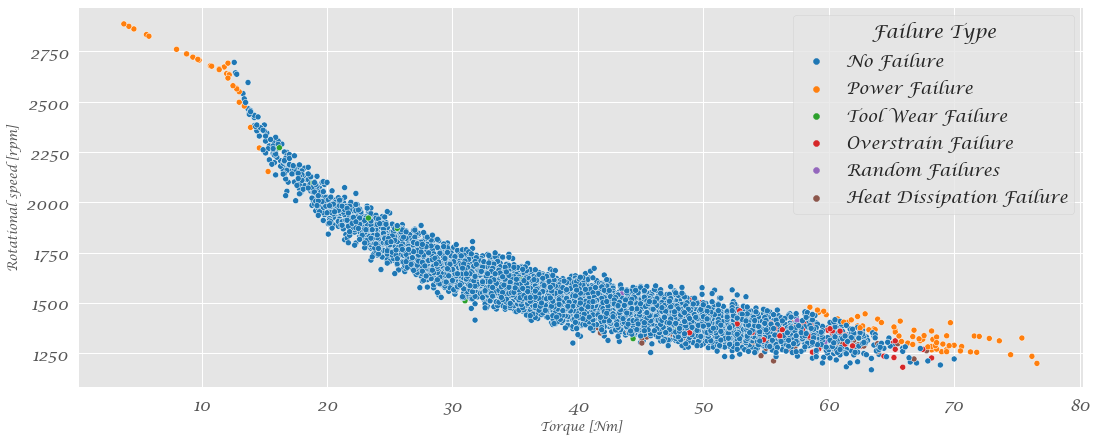

In [20]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=main, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

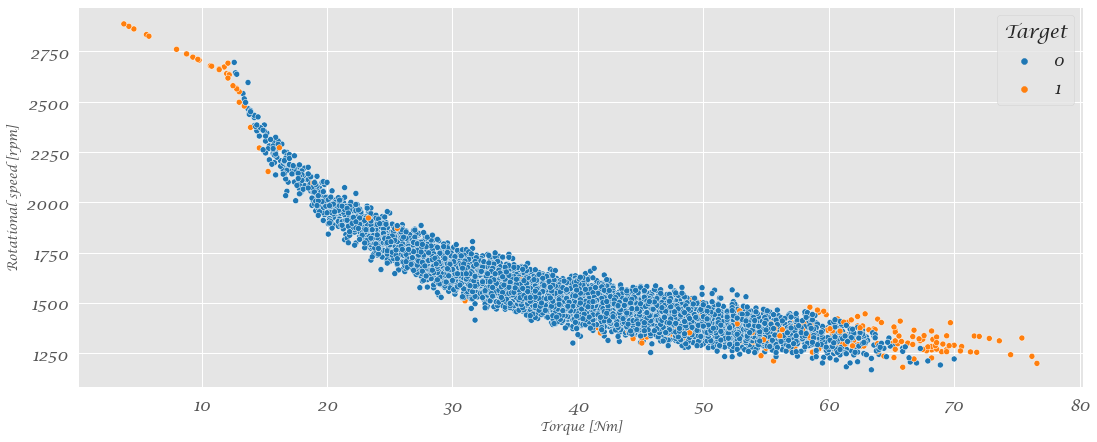

In [21]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=main, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

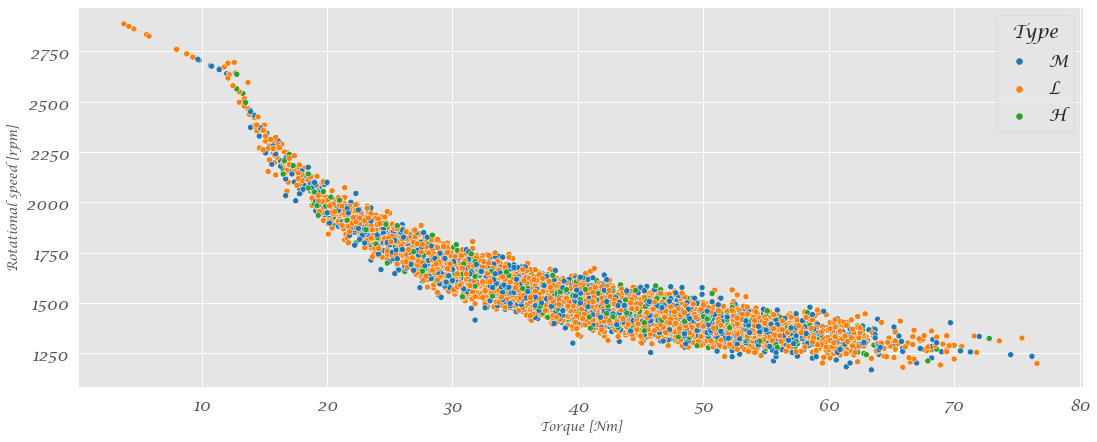

In [22]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=main, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

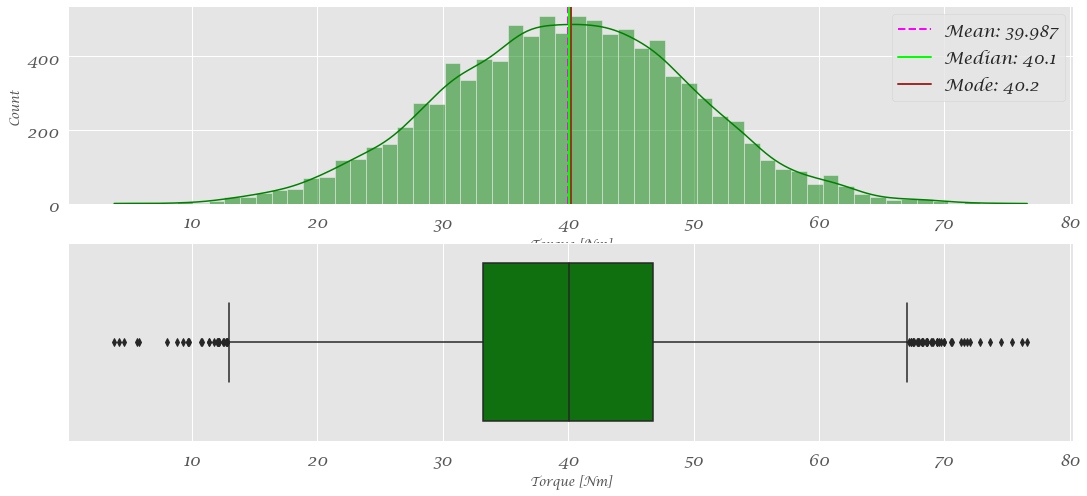

In [23]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = main[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = main[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(main[feature].mean(), 3)))
    ax[0].axvline(x = main[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(main[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(main[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(main[feature])))
    ax[0].legend()
    
    sns.boxplot(x = main[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Torque [Nm]')

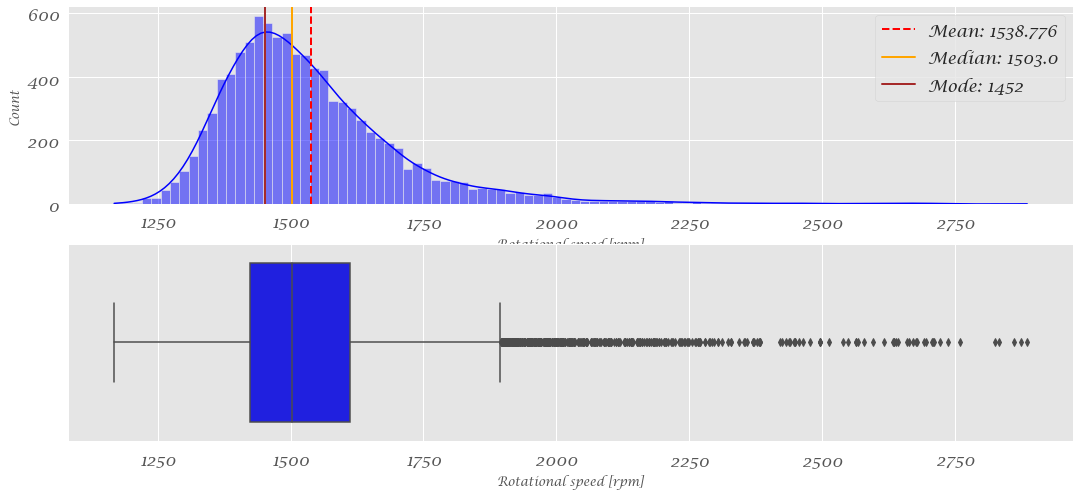

In [24]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = main[feature], kde = True, ax = ax[0],color='blue')

    ax[0].axvline(x = main[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(main[feature].mean(), 3)))
    ax[0].axvline(x = main[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(main[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(main[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(main[feature])))
    ax[0].legend()
    
    sns.boxplot(x = main[feature], ax = ax[1],color='blue')
    
    plt.show()

plot_hist('Rotational speed [rpm]')

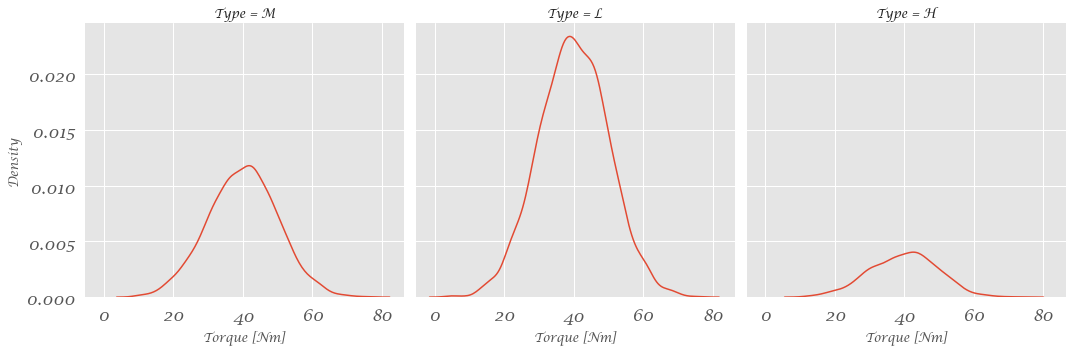

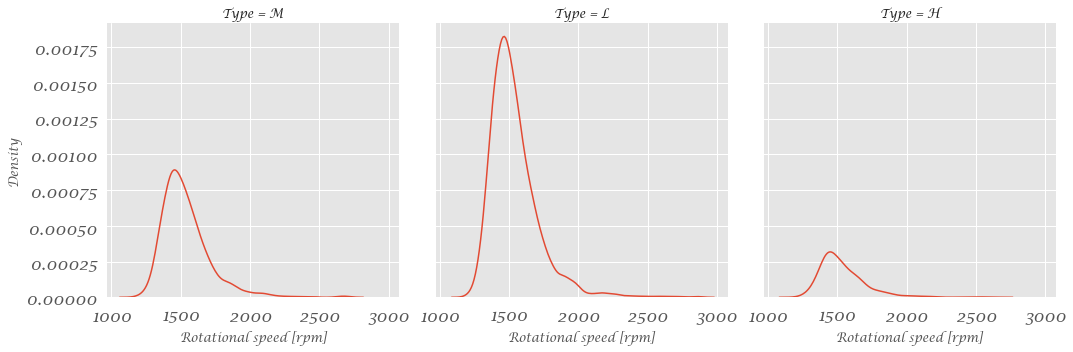

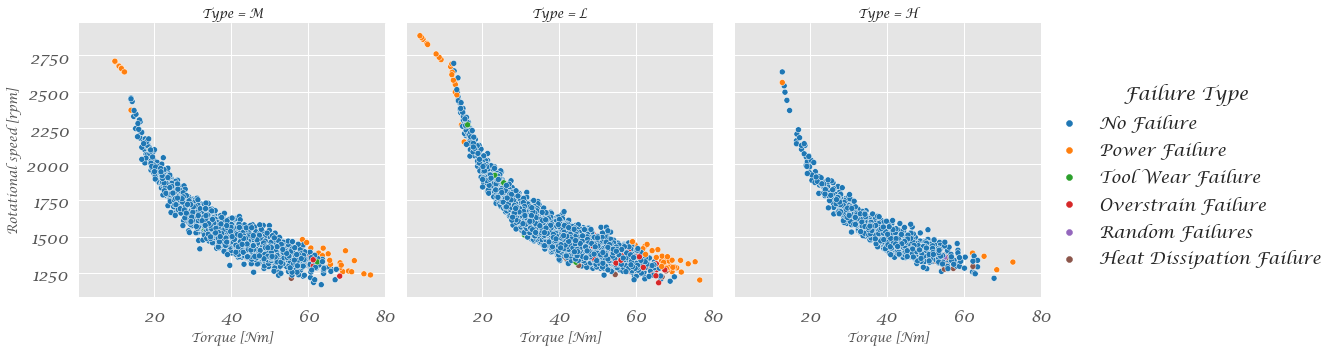

In [25]:
sns.displot(data=main, x="Torque [Nm]", col="Type", kind="kde");
sns.displot(data=main, x="Rotational speed [rpm]", col="Type", kind="kde");
sns.relplot(data=main, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

In [26]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
main = encoder.fit_transform(main)
main.head(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,1
2,2,298.1,308.5,1498,49.4,5,0,1
3,2,298.2,308.6,1433,39.5,7,0,1
4,2,298.2,308.7,1408,40.0,9,0,1


In [27]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
main['Failure Type'] = scaler.fit_transform(main['Failure Type'])

In [28]:
X = main.drop(columns="Failure Type" , axis=1)
y = main["Failure Type"]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.5 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1935
           1       1.00      0.95      0.97        20
           2       1.00      0.82      0.90        11
           3       0.80      0.92      0.86        13
           4       0.00      0.00      0.00         6
           5       0.94      1.00      0.97        15

    accuracy                           0.99      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.99      0.99      0.99      2000

--------------------------------------------------------


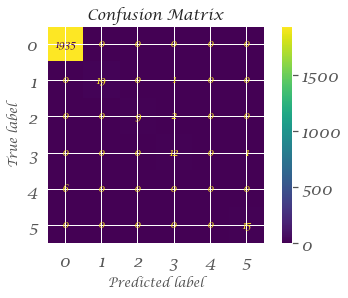

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');